Name - Mahitha Mereddy ||
UBIT name - mahitham ||
Email - mahitham@buffalo.edu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784') #Fetching the MNIST dataset using library functions
x = mnist.data #Training data
y = np.asarray(mnist.target, dtype=np.int32) #Labels

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
y[0]

5

In [ ]:
#Splitting the data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(52500, 784)
(17500, 784)


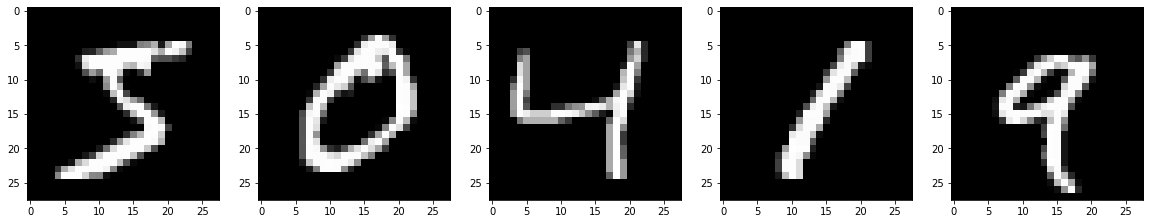

In [ ]:
#Plotting the first five images of the dataset

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

In [ ]:
y_train_copy = y_train
y_train_copy = y_train_copy.reshape(y_train.shape[0],1) #To make the labels i.e. y 2-Dimensional

#Concatenating the labels to the data to get the full dataset. Essentially just adding an extra column for the labels to the data
full_train = np.concatenate((x_train, y_train_copy), axis = 1)
print(full_train.shape)
print(y_train.shape)

(52500, 785)
(52500,)


In [ ]:
full_train[:,-1] #All rows and all but the last column

array([6., 9., 1., ..., 7., 1., 1.])

In [ ]:
# Returns all rows in the training set that have the label digit
def get_rows_digit(full_train, digit):

  d = []
  for row in full_train:
    if row[-1] == digit:
      d.append(row[:-1])

  return d

#Returns the mean image for the digit
def digits_mean(full_train, train, labels, digit):
  
  digit_data = get_rows_digit(full_train, digit)
  digit_mean = np.mean(digit_data, axis=0)
  plt.imshow(np.reshape(digit_mean, (28, 28)), cmap='gray')
  plt.show()

  return digit_mean

#Returns the standard deviation image for the digit
def digits_std(full_train, train, labels, digit):
  
  digit_data = get_rows_digit(full_train, digit)
  digit_std = np.std(digit_data, axis=0)
  plt.imshow(np.reshape(digit_std, (28, 28)), cmap='gray')
  plt.show()

  digit_data = np.array(digit_data)
  covar = np.cov(digit_data.T) #Covariance matrix
  np.fill_diagonal(covar, covar.diagonal() + 0.1) #Adding a small value to the diagonal to avoid a zero determinant

  return covar


Mean image for digit 0


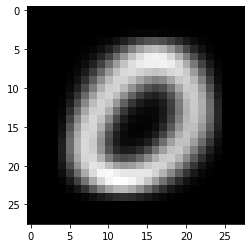

Standard Deviation image for digit 0


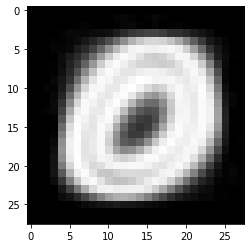

Mean image for digit 1


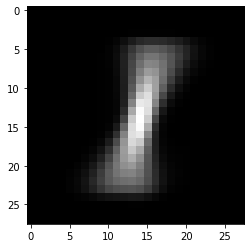

Standard Deviation image for digit 1


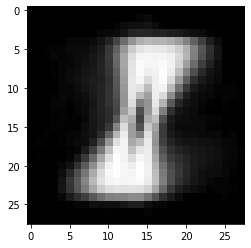

Mean image for digit 2


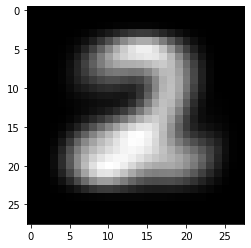

Standard Deviation image for digit 2


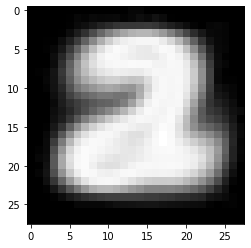

Mean image for digit 3


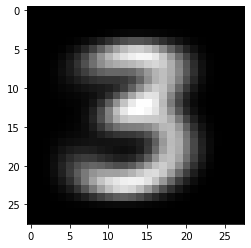

Standard Deviation image for digit 3


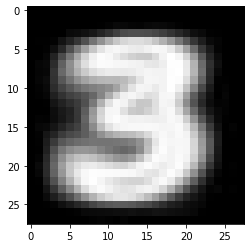

Mean image for digit 4


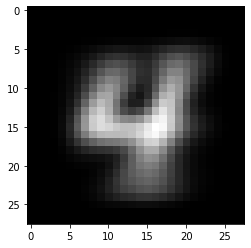

Standard Deviation image for digit 4


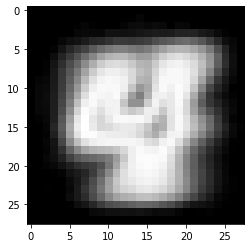

Mean image for digit 5


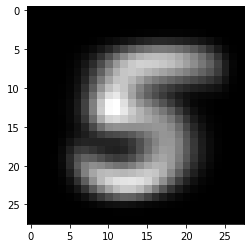

Standard Deviation image for digit 5


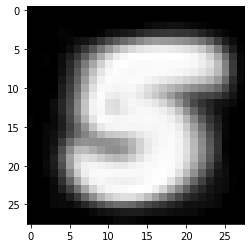

Mean image for digit 6


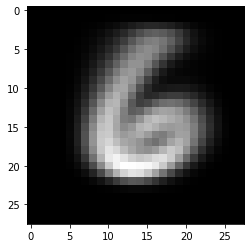

Standard Deviation image for digit 6


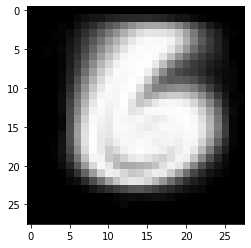

Mean image for digit 7


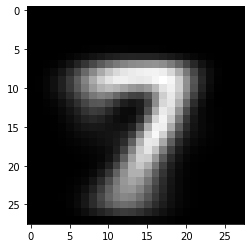

Standard Deviation image for digit 7


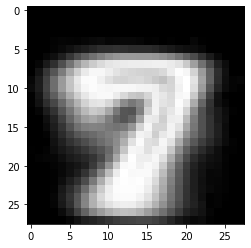

Mean image for digit 8


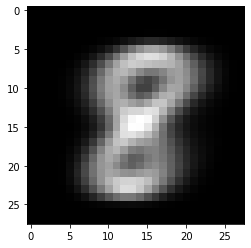

Standard Deviation image for digit 8


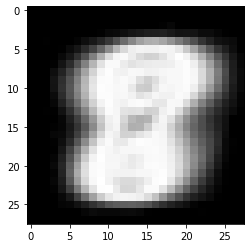

Mean image for digit 9


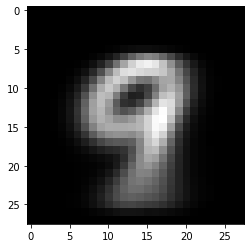

Standard Deviation image for digit 9


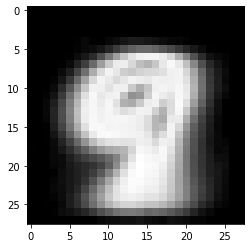

In [ ]:
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
means = [] #Means of all the MNIST digits
covariances = [] #Covariances of all the MNIST digits

for digit in digits:
  print("Mean image for digit", digit)
  means.append(digits_mean(full_train, x_train, y_train, digit))
  print("Standard Deviation image for digit", digit)
  covariances.append(digits_std(full_train, x_train, y_train, digit))

In [ ]:
# Returns prior probabilites of all the digits as a list
def get_prior_probabilities(full_train):

  prior_probabilities = []

  for i in range(10):
    prior_probabilities.append(0)

  for row in full_train:
    digit = int(row[-1])
    prior_probabilities[digit] = prior_probabilities[digit] + 1

  for i in range(len(prior_probabilities)):
    prior_probabilities[i] = prior_probabilities[i]/52500

  return prior_probabilities

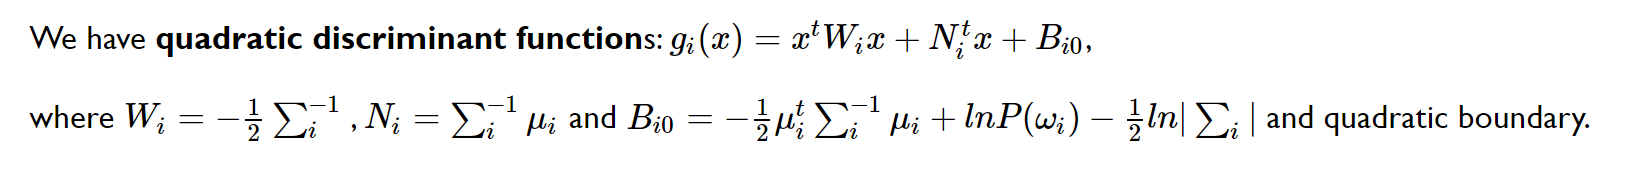

In [ ]:
# Returns the W values for all the digits as a list
def get_W(covariances):

  W = []
  for digit in range(len(digits)):
    Wi = -1/2* np.linalg.inv(covariances[digit])
    W.append(Wi)

  return W

# Returns the N values for all the digits as a list
def get_N(covariances, means):

  N = []
  for digit in range(len(digits)):
    Ni = np.matmul(np.linalg.inv(covariances[digit]), means[digit])
    N.append(Ni)

  return N

# Returns the B values for all the digits as a list
def get_B(covariances, means, prior_probabilities):

  B = []
  for digit in range(len(digits)):

    B_m1 = np.matmul(means[digit].T, np.linalg.inv(covariances[digit])) #First multiplication of the first term of the bias
    B_term1 = 1/2 * np.matmul(B_m1, means[digit])
    B_term2 = np.log(prior_probabilities[digit])
    sign,det=np.linalg.slogdet(covariances[digit])
    B_term3 = 1/2 * det
    Bi0 = -B_term1 + B_term2 -B_term3

    B.append(Bi0)

  return B

In [ ]:
# Returns the quadratic discriminant function values for all the digits as a list
def quadratic_discriminant_function(row, W, N, B):

  g = []

  for digit in digits:

    g_m1 = np.matmul(row.T, W[digit]) #First multiplication of the first term of g
    gi = np.matmul(g_m1, row) + np.matmul(N[digit].T, row) + B[digit]

    g.append(gi)

  return np.argmax(np.array(g))

In [ ]:
prior_probabilities = get_prior_probabilities(full_train)

W = get_W(covariances)
N = get_N(covariances, means)
B = get_B(covariances, means, prior_probabilities)

# Returns the prediction labels for the input data
def get_class_predictions(x, W, N, B):

  predictions = []

  for i in range(len(x)):

    if i%10000 == 0:
      print(i," rows processed")

    row = x[i]
    prediction = quadratic_discriminant_function(row.reshape(784,), W, N, B)
    predictions.append(prediction)

  return predictions

In [ ]:
train_predictions = get_class_predictions(x_train, W, N, B)

0  rows processed
10000  rows processed
20000  rows processed
30000  rows processed
40000  rows processed
50000  rows processed


In [ ]:
# Returns the accuracy of the model
def get_accuracy(predictions, y):

  count = 0 #Count of the number of correct predictions

  for i in range(len(predictions)):

    if predictions[i] == y[i]:
      count = count+1

  return (count/len(predictions))*100

In [ ]:
train_accuracy = get_accuracy(train_predictions, y_train)

print("Training accuracy is ", train_accuracy)

Training accuracy is  83.93142857142857


In [ ]:
test_predictions = get_class_predictions(x_test, W, N, B)
test_accuracy = get_accuracy(test_predictions, y_test)

print("Testing accuracy is ", test_accuracy)

0  rows processed
10000  rows processed
Testing accuracy is  80.41142857142857


One disadvantage of QDA is that it cannot be used as a dimensionality reduction technique.  LDA is a much less flexible classifier than QDA, and so has substantially lower variance. This can potentially lead to improved prediction performance. But there is a trade-off: if LDA’s assumption that the the predictor variable share a common variance across each Y response class is badly off, then LDA can suffer from high bias. Roughly speaking, LDA tends to be a better bet than QDA if there are relatively few training observations and so reducing variance is crucial. In contrast, QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern, or if the assumption of a common covariance matrix is clearly untenable.

Reference - https://uc-r.github.io/discriminant_analysis